In [235]:

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [236]:
# importing the csv
car_price = pd.read_csv("CarPrice_Assignment.csv")

In [237]:
car_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [238]:
car_price.shape

(205, 26)

In [239]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [240]:
car_price.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [241]:
#dropping the car_ID column
car_price= car_price.drop('car_ID', axis=1)

In [242]:
car_price.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [243]:
car_price.shape

(205, 25)

In [244]:
#splitting the car_name column to car_name and model_name
car_price[['Car_Name','Car_Model']] = car_price['CarName'].str.split(' ', n=1, expand=True)

#car_price['CarName'] = new[0]
#car_price['CarModel']= new[1]
car_price= car_price.drop('CarName', axis=1)

car_price.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Car_Name,Car_Model
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


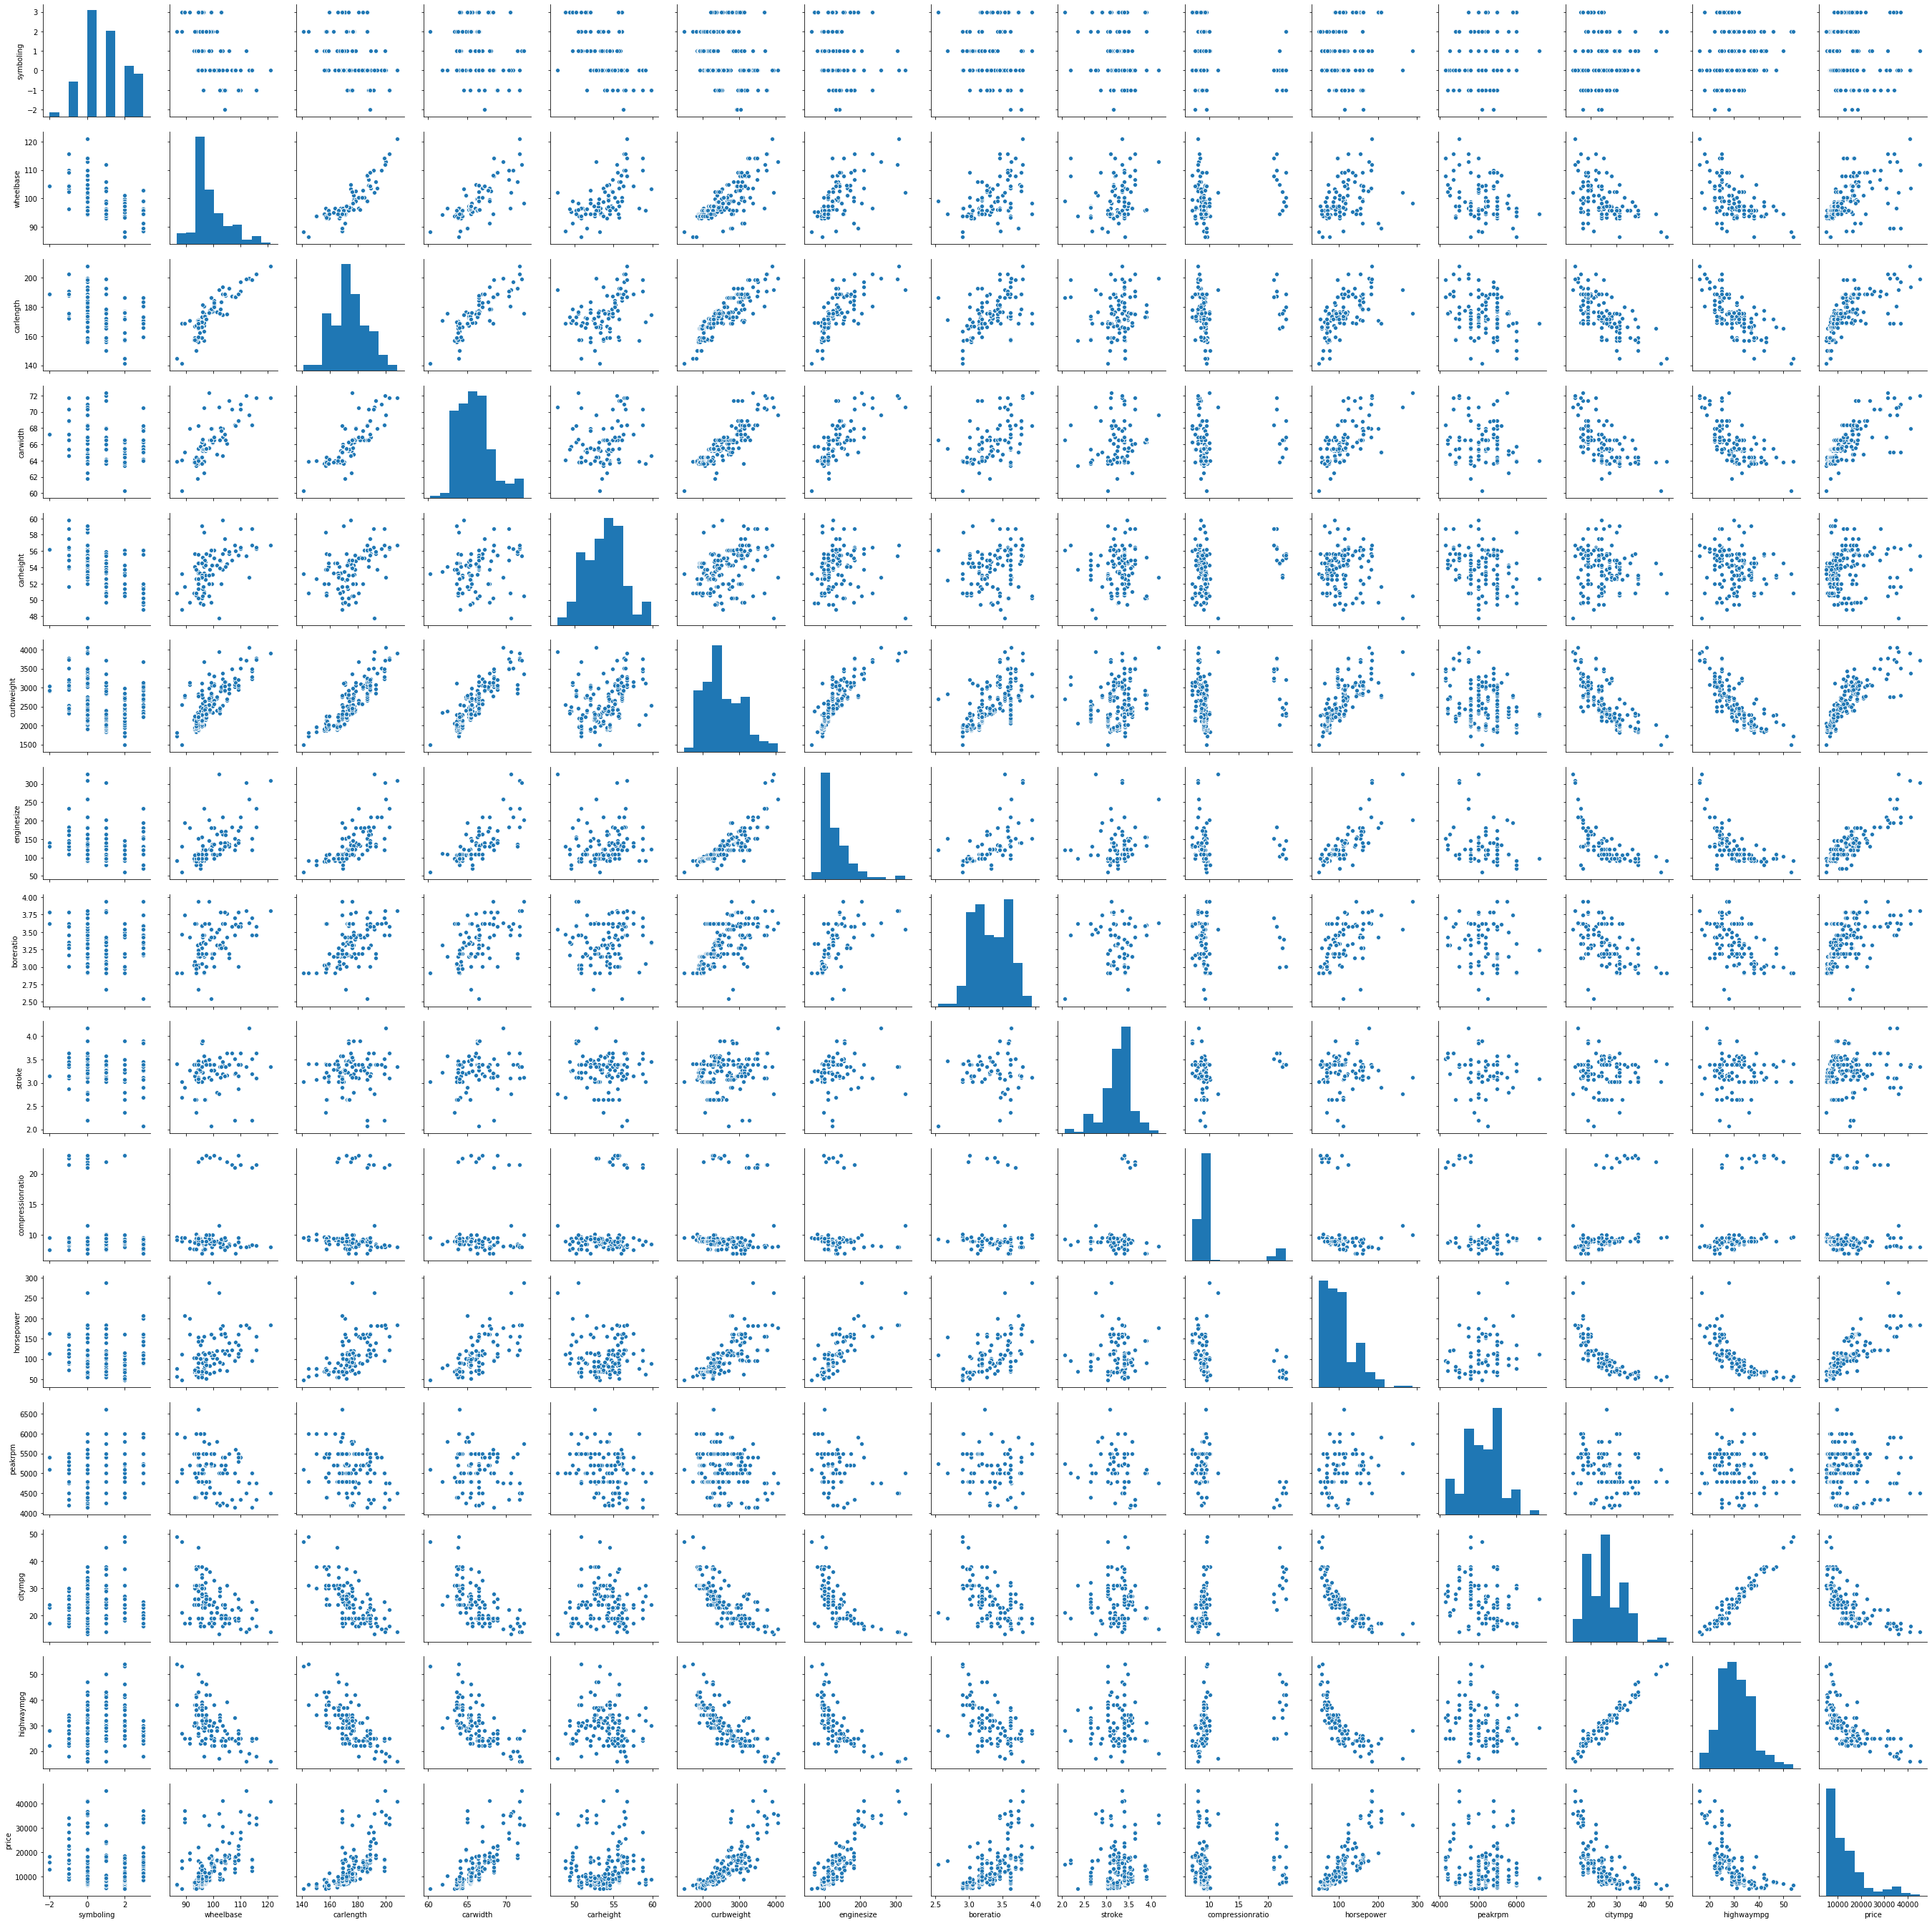

<Figure size 7200x7200 with 0 Axes>

In [245]:
sns.pairplot(car_price)
plt.figure(figsize= (100,100))
plt.show()

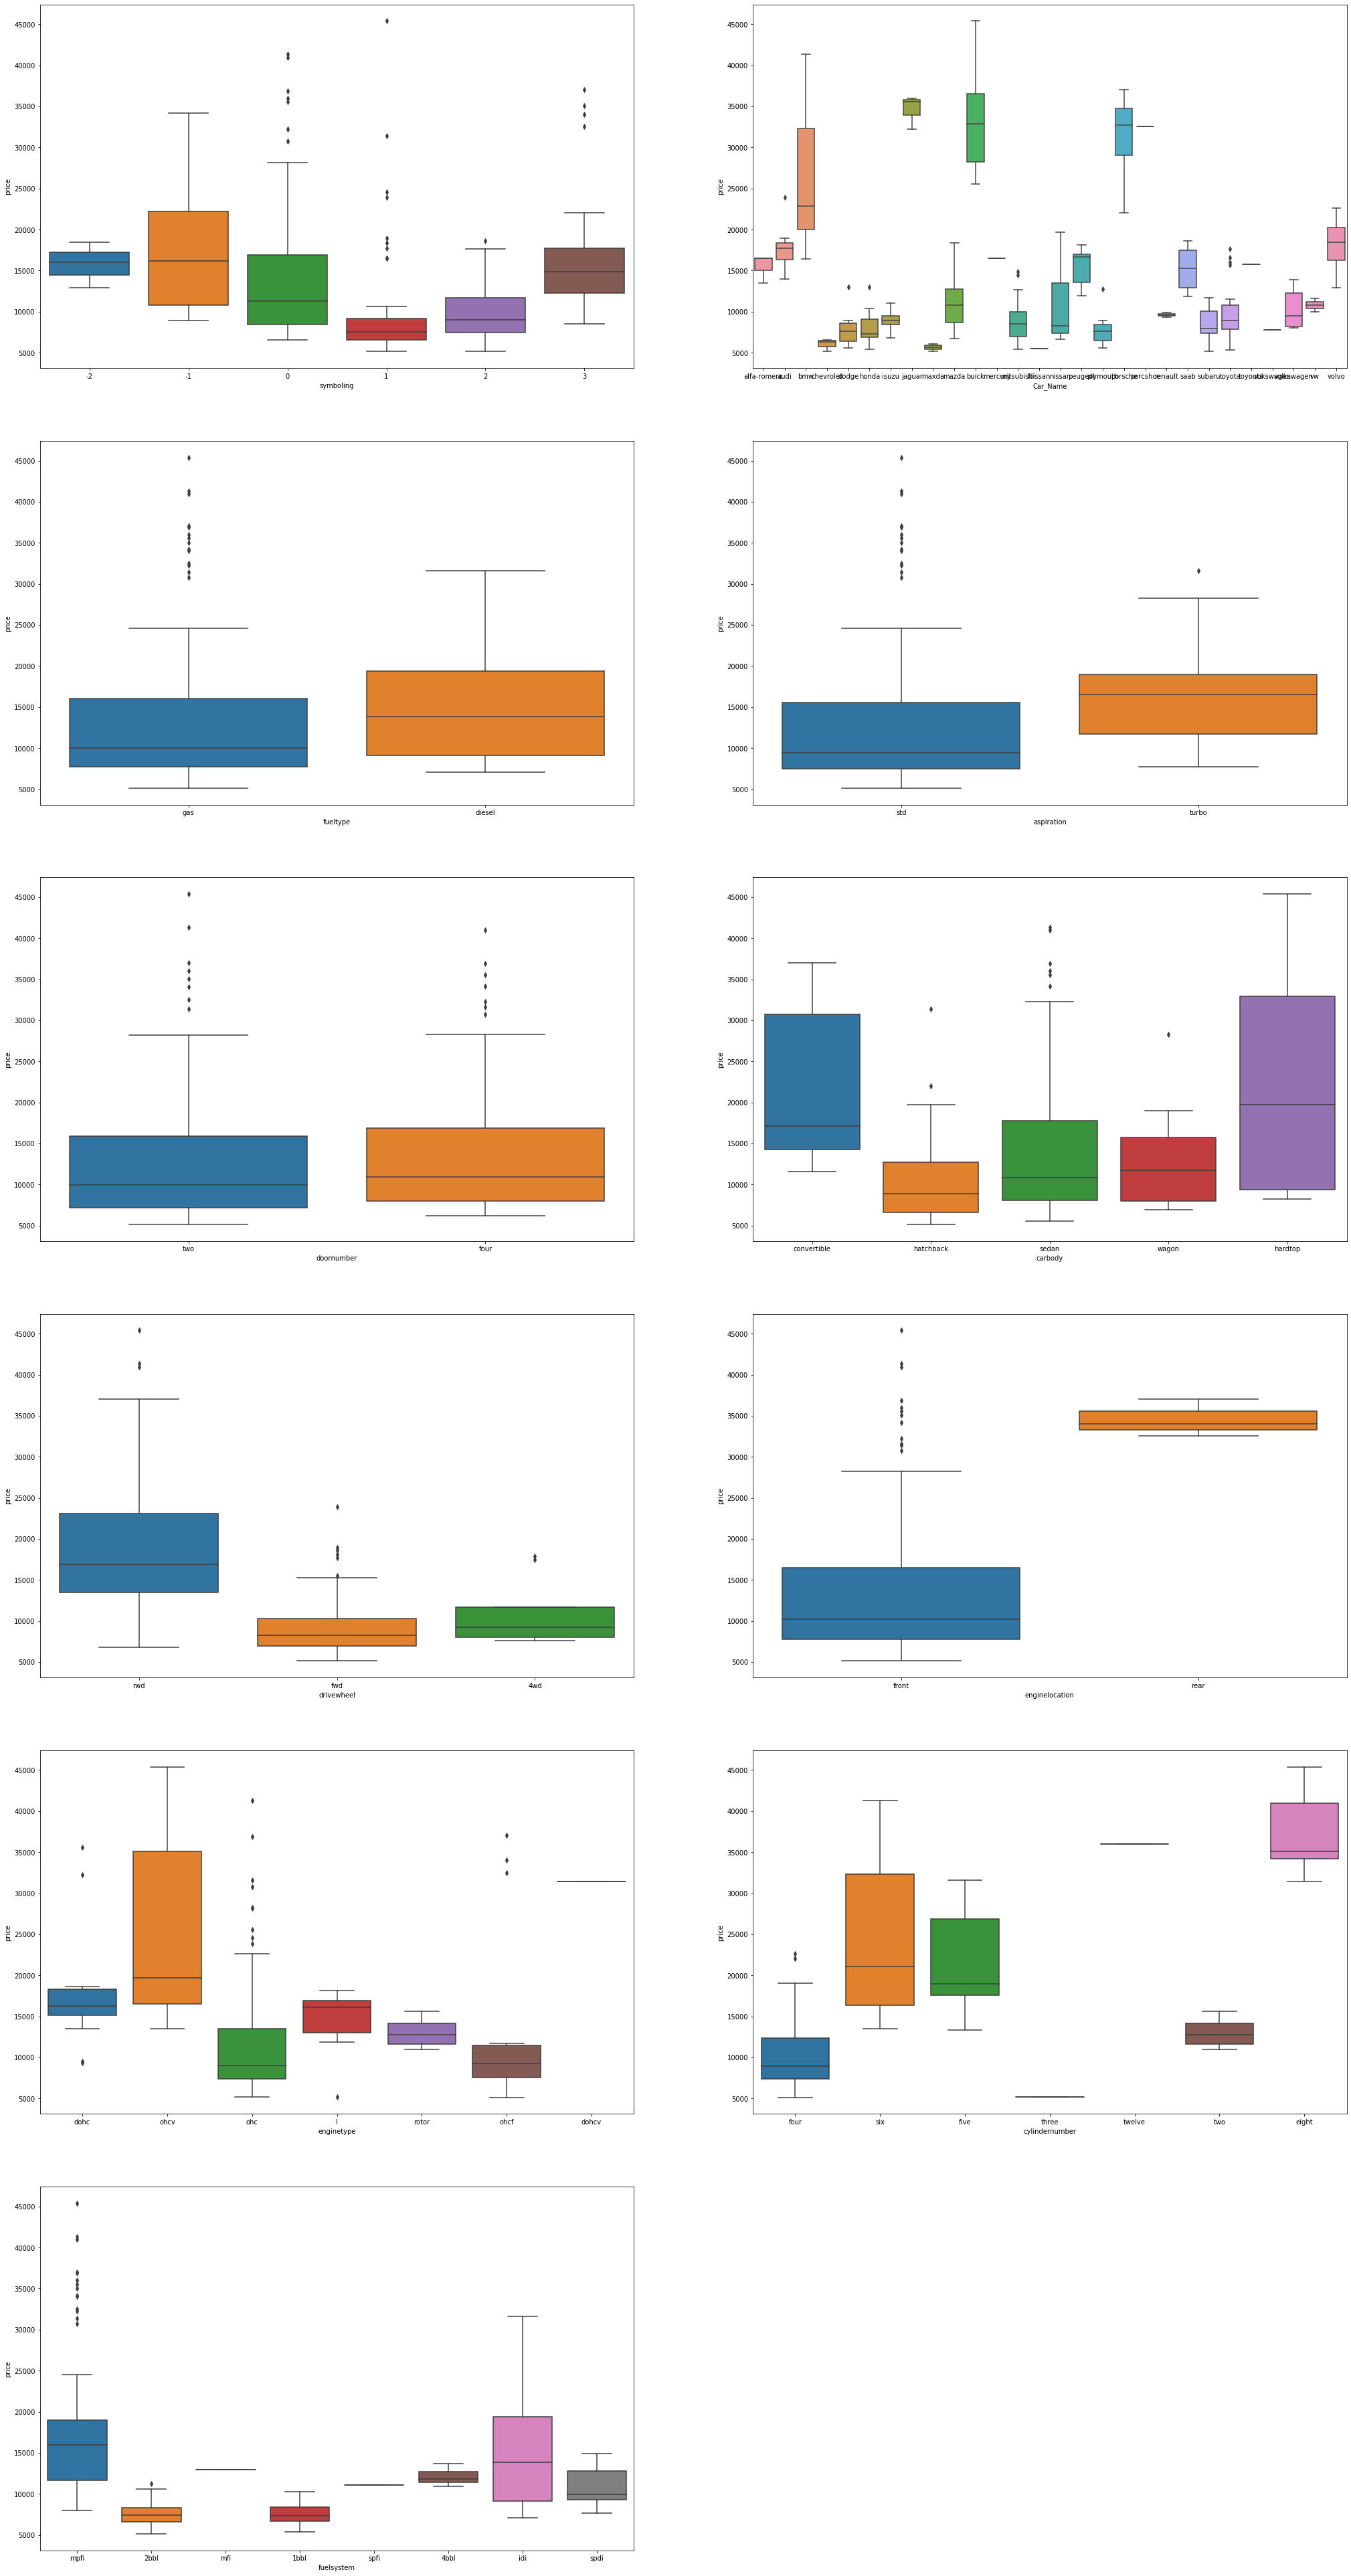

In [246]:
plt.figure(figsize=(35,70))
plt.subplot(6,2,1)
sns.boxplot(x = 'symboling', y = 'price', data = car_price)
plt.subplot(6,2,2)
sns.boxplot(x = 'Car_Name', y = 'price', data = car_price)
plt.subplot(6,2,3)
sns.boxplot(x = 'fueltype', y = 'price', data = car_price)
plt.subplot(6,2,4)
sns.boxplot(x = 'aspiration', y = 'price', data = car_price)
plt.subplot(6,2,5)
sns.boxplot(x = 'doornumber', y = 'price', data = car_price)
plt.subplot(6,2,6)
sns.boxplot(x = 'carbody', y = 'price', data = car_price)
plt.subplot(6,2,7)
sns.boxplot(x = 'drivewheel', y = 'price', data = car_price)
plt.subplot(6,2,8)
sns.boxplot(x = 'enginelocation', y = 'price', data = car_price)
plt.subplot(6,2,9)
sns.boxplot(x = 'enginetype', y = 'price', data = car_price)
plt.subplot(6,2,10)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car_price)
plt.subplot(6,2,11)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car_price)

plt.show()

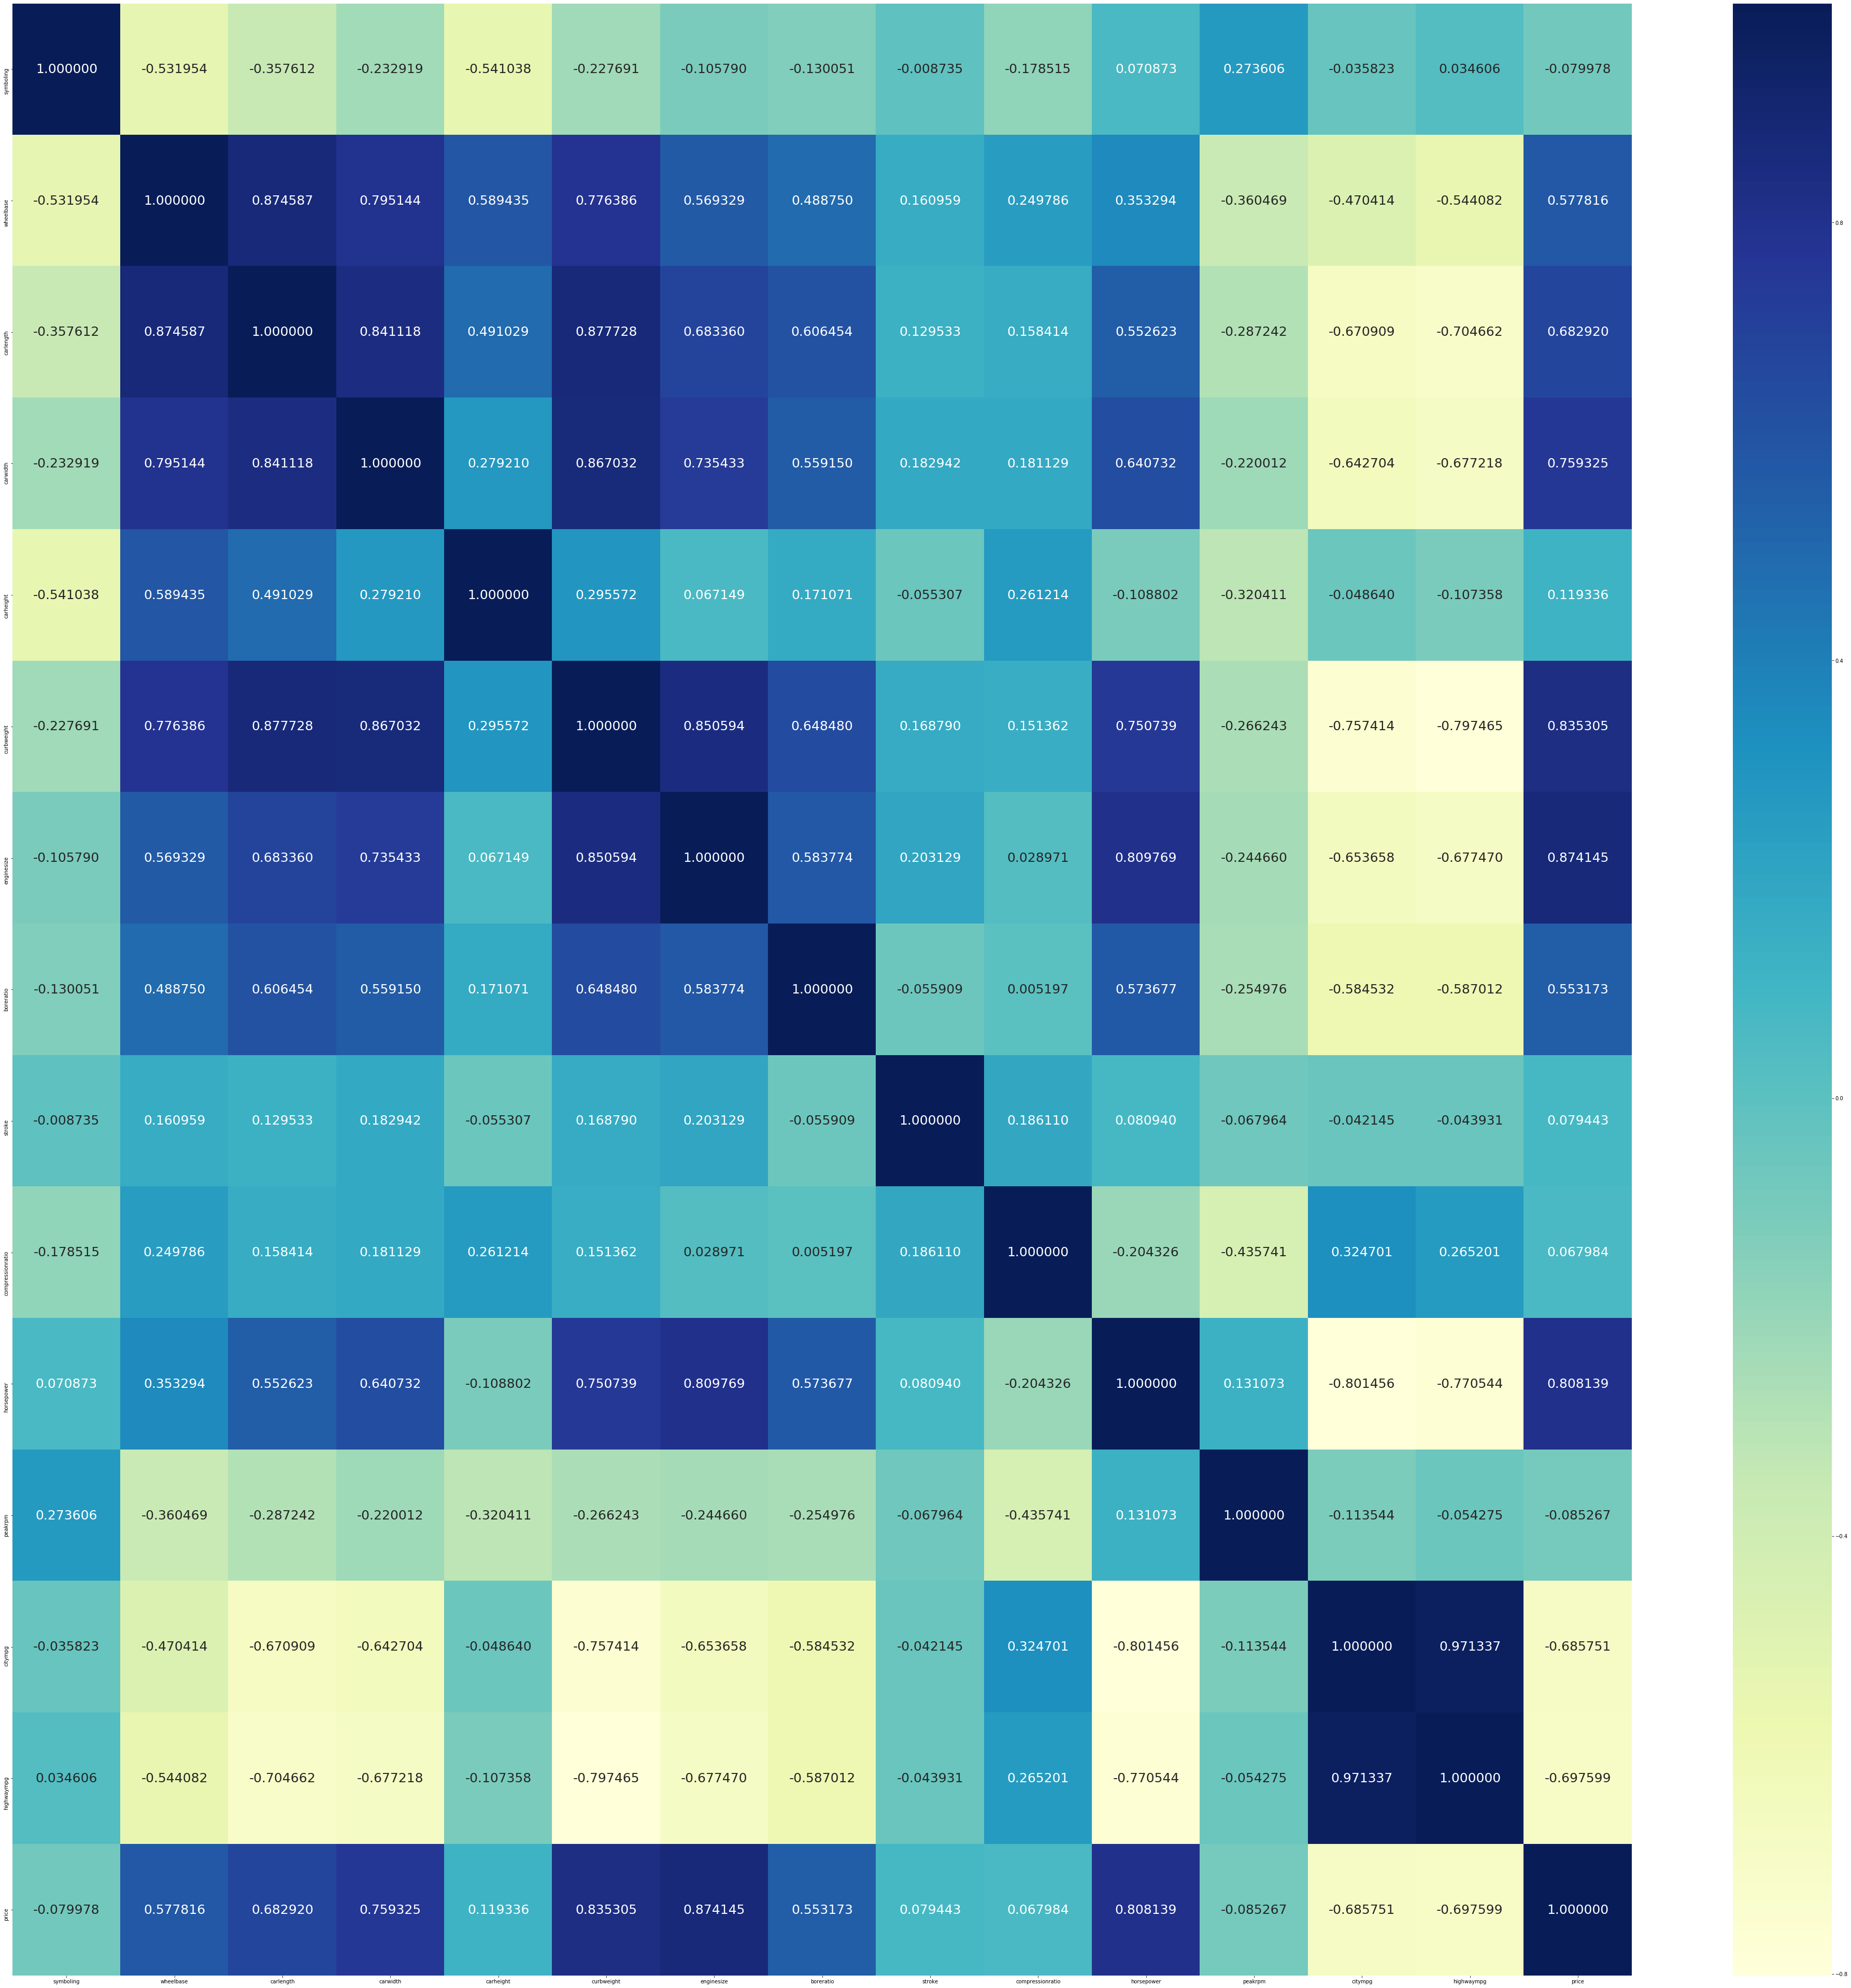

In [254]:
plt.figure(figsize=(70,70),)
sns.heatmap(car_price.corr(), cmap="YlGnBu", annot = True,fmt='f', annot_kws={"size": 25})

plt.show()

In [255]:
# getting unique values from categorical columns
cat_col= ['symboling','Car_Name','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype'
          ,'cylindernumber','fuelsystem']
for i in cat_col:
    print(car_price[i].unique())

[ 3  1  2  0 -1 -2]
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']
['gas' 'diesel']
['std' 'turbo']
['two' 'four']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [256]:
#replacing the incorrect values with the correct values
car_price['Car_Name']= car_price['Car_Name'].replace(to_replace =["maxda"],value ="mazda")
car_price['Car_Name']= car_price['Car_Name'].replace(to_replace =["nissan"],value ="Nissan")           
car_price['Car_Name']= car_price['Car_Name'].replace(to_replace =["porcshce"],value ="porsche")   
car_price['Car_Name']= car_price['Car_Name'].replace(to_replace =["toyouta"],value ="toyota") 
car_price['Car_Name']= car_price['Car_Name'].replace(to_replace =["vokswagen","vw"],value ="volkswagen")
car_price['drivewheel']= car_price['drivewheel'].replace(to_replace =["4wd"],value ="fwd")

In [257]:
cat_col= ['symboling','Car_Name','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype'
          ,'cylindernumber','fuelsystem']
for i in cat_col:
    print(car_price[i].unique())

[ 3  1  2  0 -1 -2]
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']
['gas' 'diesel']
['std' 'turbo']
['two' 'four']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd']
['front' 'rear']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [258]:
(car_price['Car_Name'].nunique())


22

In [259]:
#creating the dummy variables
dummy_1 = pd.get_dummies(car_price['Car_Name'], drop_first = True)
dummy_2 = pd.get_dummies(car_price['symboling'], drop_first = True)
dummy_3 = pd.get_dummies(car_price['fueltype'], drop_first = True)
dummy_4 = pd.get_dummies(car_price['aspiration'], drop_first = True)
dummy_5 = pd.get_dummies(car_price['doornumber'], drop_first = True)
dummy_6 = pd.get_dummies(car_price['carbody'], drop_first = True)
dummy_7 = pd.get_dummies(car_price['drivewheel'], drop_first = True)
dummy_8 = pd.get_dummies(car_price['enginelocation'], drop_first = True)
dummy_9 = pd.get_dummies(car_price['enginetype'], drop_first = True)
dummy_10 = pd.get_dummies(car_price['cylindernumber'], drop_first = True)
dummy_11 = pd.get_dummies(car_price['fuelsystem'], drop_first = True)


In [260]:
#concatenating the dummy data sets
car_price = pd.concat([car_price, dummy_1, dummy_2, dummy_3,dummy_4, dummy_5, dummy_6, dummy_7, dummy_8, dummy_9,dummy_10, dummy_11], axis = 1)

In [261]:
car_price.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,0,0,0,0,0,0,0,1,0,0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,0,0,0,0,0,0,0,1,0,0
4,2,gas,std,four,sedan,fwd,front,99.4,176.6,66.4,...,0,0,0,0,0,0,0,1,0,0


In [262]:
for i in cat_col:
    car_price.drop(i, axis = 1, inplace = True)

In [263]:
car_price.head()


,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,1,0,0


In [264]:
car_price.drop('Car_Model', axis = 1, inplace = True)
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 68 columns):
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginesize          205 non-null int64
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg          205 non-null int64
price               205 non-null float64
alfa-romero         205 non-null uint8
audi                205 non-null uint8
bmw                 205 non-null uint8
buick               205 non-null uint8
chevrolet           205 non-null uint8
dodge               205 non-null uint8
honda               205 non-null uint8
isuzu               205 non-null uint8
jaguar              2

In [265]:
#extracting the numerical columns
ex= car_price.select_dtypes(exclude =['uint8','object'])
num_vars= ex.columns
print(num_vars)

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')


In [266]:
#splitting the data into train and test
np.random.seed(0)
df_train, df_test = train_test_split(car_price, train_size = 0.7, test_size = 0.3, random_state = 100)

In [267]:
df_train.columns

Index([       'wheelbase',        'carlength',         'carwidth',
              'carheight',       'curbweight',       'enginesize',
              'boreratio',           'stroke', 'compressionratio',
             'horsepower',          'peakrpm',          'citympg',
             'highwaympg',            'price',      'alfa-romero',
                   'audi',              'bmw',            'buick',
              'chevrolet',            'dodge',            'honda',
                  'isuzu',           'jaguar',            'mazda',
                'mercury',       'mitsubishi',          'peugeot',
               'plymouth',          'porsche',          'renault',
                   'saab',           'subaru',           'toyota',
             'volkswagen',            'volvo',                 -1,
                        0,                  1,                  2,
                        3,              'gas',            'turbo',
                    'two',          'hardtop',        'hatchba

In [268]:
df_test.columns

Index([       'wheelbase',        'carlength',         'carwidth',
              'carheight',       'curbweight',       'enginesize',
              'boreratio',           'stroke', 'compressionratio',
             'horsepower',          'peakrpm',          'citympg',
             'highwaympg',            'price',      'alfa-romero',
                   'audi',              'bmw',            'buick',
              'chevrolet',            'dodge',            'honda',
                  'isuzu',           'jaguar',            'mazda',
                'mercury',       'mitsubishi',          'peugeot',
               'plymouth',          'porsche',          'renault',
                   'saab',           'subaru',           'toyota',
             'volkswagen',            'volvo',                 -1,
                        0,                  1,                  2,
                        3,              'gas',            'turbo',
                    'two',          'hardtop',        'hatchba

In [269]:
#scaling the data using the min max scaler
scaler = MinMaxScaler()
num_vars

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [270]:
df_train.columns

Index([       'wheelbase',        'carlength',         'carwidth',
              'carheight',       'curbweight',       'enginesize',
              'boreratio',           'stroke', 'compressionratio',
             'horsepower',          'peakrpm',          'citympg',
             'highwaympg',            'price',      'alfa-romero',
                   'audi',              'bmw',            'buick',
              'chevrolet',            'dodge',            'honda',
                  'isuzu',           'jaguar',            'mazda',
                'mercury',       'mitsubishi',          'peugeot',
               'plymouth',          'porsche',          'renault',
                   'saab',           'subaru',           'toyota',
             'volkswagen',            'volvo',                 -1,
                        0,                  1,                  2,
                        3,              'gas',            'turbo',
                    'two',          'hardtop',        'hatchba

In [271]:
df_train.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0
mean,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.497946,0.535389,0.190787,0.227302,...,0.006993,0.006993,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0
std,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.207140,0.157843,0.237181,0.165511,...,0.083624,0.083624,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,0.305556,0.464646,0.100000,0.091667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
50%,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,0.500000,0.545455,0.125000,0.191667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
75%,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,0.682540,0.611111,0.150000,0.283333,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0


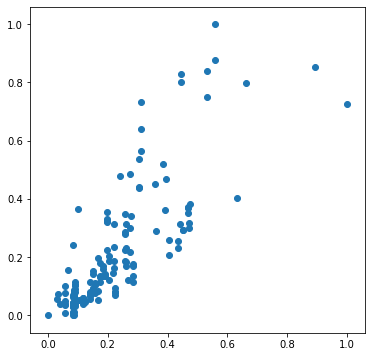

In [272]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.horsepower, df_train.price)
plt.show()

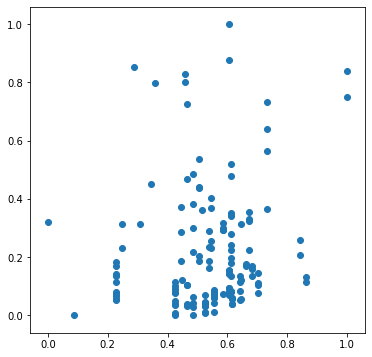

In [273]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.stroke, df_train.price)
plt.show()

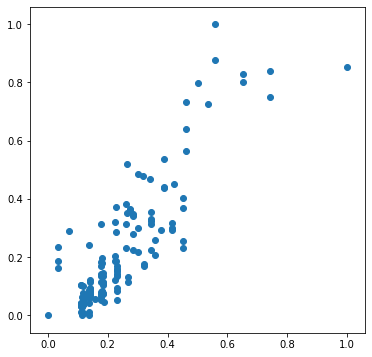

In [274]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.enginesize, df_train.price)
plt.show()

In [275]:
y_train = df_train.pop('price')
X_train = df_train

In [276]:
#building the model using statesmodel
X_train_lm = sm.add_constant(X_train[['stroke']])

lr = sm.OLS(y_train, X_train_lm).fit()

In [277]:
lr.params

const     0.107511
stroke    0.208818
dtype: float64

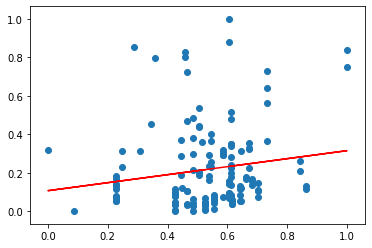

In [278]:
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.107 + 0.208*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [279]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     3.372
Date:                Mon, 20 Jan 2020   Prob (F-statistic):             0.0684
Time:                        06:12:34   Log-Likelihood:                 18.638
No. Observations:                 143   AIC:                            -33.28
Df Residuals:                     141   BIC:                            -27.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1075      0.063      1.694      0.0

In [280]:
import statsmodels.api as sm
X_train_lm = X_train[['stroke', 'enginesize']]
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const        -0.041302
stroke       -0.065939
enginesize    1.226075
dtype: float64

In [281]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     216.3
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.52e-43
Time:                        06:12:37   Log-Likelihood:                 117.65
No. Observations:                 143   AIC:                            -229.3
Df Residuals:                     140   BIC:                            -220.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0413      0.033     -1.264      0.2

In [282]:
# Check all the columns of the dataframe

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const              -2.075941e-01
wheelbase           1.694719e-01
carlength          -1.471853e-01
carwidth            2.605078e-01
carheight          -1.606931e-01
curbweight          3.427139e-01
enginesize          2.046198e+00
boreratio          -6.267060e-01
stroke             -1.980995e-01
compressionratio   -2.984566e-01
horsepower         -1.706111e-01
peakrpm             1.933931e-01
citympg            -3.501880e-02
highwaympg          1.054317e-01
alfa-romero        -3.557645e-02
audi                4.573744e-02
bmw                 3.065185e-01
buick               1.788790e-02
chevrolet          -7.761443e-02
dodge              -1.300275e-01
honda              -9.405398e-02
isuzu              -2.410103e-02
jaguar             -1.507797e-01
mazda              -4.489999e-03
mercury             9.314058e-15
mitsubishi         -1.558021e-01
peugeot            -2.986504e-01
plymouth           -1.396753e-01
porsche             2.246753e-01
renault            -4.539520e-02
          

In [283]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     54.82
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.36e-47
Time:                        06:12:39   Log-Likelihood:                 282.66
No. Observations:                 143   AIC:                            -443.3
Df Residuals:                      82   BIC:                            -262.6
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2076      0.161  

In [284]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
58,three,inf
54,rotor,inf
40,gas,inf
31,subaru,inf
60,two,inf
26,peugeot,inf
48,rear,inf
50,l,inf
52,ohcf,inf
63,idi,inf


In [285]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [286]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [287]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 12),
 ('carlength', False, 16),
 ('carwidth', True, 1),
 ('carheight', False, 13),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 20),
 ('horsepower', False, 10),
 ('peakrpm', False, 11),
 ('citympg', False, 30),
 ('highwaympg', False, 21),
 ('alfa-romero', False, 35),
 ('audi', False, 31),
 ('bmw', True, 1),
 ('buick', False, 39),
 ('chevrolet', False, 18),
 ('dodge', False, 15),
 ('honda', False, 17),
 ('isuzu', False, 43),
 ('jaguar', False, 22),
 ('mazda', False, 50),
 ('mercury', False, 51),
 ('mitsubishi', False, 8),
 ('peugeot', True, 1),
 ('plymouth', False, 14),
 ('porsche', True, 1),
 ('renault', False, 33),
 ('saab', False, 4),
 ('subaru', False, 6),
 ('toyota', False, 44),
 ('volkswagen', False, 49),
 ('volvo', False, 3),
 (-1, False, 32),
 (0, False, 40),
 (1, False, 41),
 (2, False, 38),
 (3, False, 42),
 ('gas', False, 24),
 ('turbo', False, 9),
 ('two', False, 45),
 ('

In [288]:
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'bmw',
       'peugeot', 'porsche', 'rear', 'rotor', 'five', 'four', 'three',
       'twelve', 'two'],
      dtype='object')

In [289]:
X_train.columns[~rfe.support_]

Index([       'wheelbase',        'carlength',        'carheight',
       'compressionratio',       'horsepower',          'peakrpm',
                'citympg',       'highwaympg',      'alfa-romero',
                   'audi',            'buick',        'chevrolet',
                  'dodge',            'honda',            'isuzu',
                 'jaguar',            'mazda',          'mercury',
             'mitsubishi',         'plymouth',          'renault',
                   'saab',           'subaru',           'toyota',
             'volkswagen',            'volvo',                 -1,
                        0,                  1,                  2,
                        3,              'gas',            'turbo',
                    'two',          'hardtop',        'hatchback',
                  'sedan',            'wagon',              'rwd',
                  'dohcv',                'l',              'ohc',
                   'ohcf',             'ohcv',              's

In [290]:
X_train_rfe = X_train[col]

In [291]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [292]:
lm = sm.OLS(y_train,X_train_rfe).fit() 

In [293]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     131.9
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           9.80e-70
Time:                        06:12:48   Log-Likelihood:                 217.73
No. Observations:                 143   AIC:                            -403.5
Df Residuals:                     127   BIC:                            -356.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2823      0.039     -7.320      0.0

In [294]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,two,inf
10,rotor,inf
0,const,67.81
3,enginesize,29.23
12,four,13.32
2,curbweight,12.11
1,carwidth,6.17
4,boreratio,5.71
14,twelve,3.06
11,five,2.94


In [295]:
X_train_new = X_train_rfe.drop(["two"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm_1 = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm_1).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     141.8
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.03e-70
Time:                        06:12:50   Log-Likelihood:                 217.45
No. Observations:                 143   AIC:                            -404.9
Df Residuals:                     128   BIC:                            -360.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2770      0.038     -7.337      0.0

In [296]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_1.values, i) for i in range(X_train_lm_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,65.22
3,enginesize,27.43
12,four,13.23
2,curbweight,11.40
1,carwidth,6.06
4,boreratio,5.63
10,rotor,5.46
14,twelve,3.05
11,five,2.91
5,stroke,2.46


In [297]:
X_train_new = X_train_rfe.drop(["enginesize",'two'], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm_2 = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm_2).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     101.3
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           5.01e-61
Time:                        06:12:52   Log-Likelihood:                 189.73
No. Observations:                 143   AIC:                            -351.5
Df Residuals:                     129   BIC:                            -310.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1639      0.042     -3.890      0.0

In [298]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_2.values, i) for i in range(X_train_lm_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,55.57
2,curbweight,9.11
1,carwidth,6.03
11,four,5.50
3,boreratio,3.33
7,porsche,1.89
8,rear,1.74
9,rotor,1.65
6,peugeot,1.64
10,five,1.64


In [299]:
X_train_new = X_train_rfe.drop(["enginesize",'two',"four"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm_3 = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm_3).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     110.5
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           4.72e-62
Time:                        06:12:56   Log-Likelihood:                 189.71
No. Observations:                 143   AIC:                            -353.4
Df Residuals:                     130   BIC:                            -314.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1691      0.029     -5.853      0.0

In [300]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_3.values, i) for i in range(X_train_lm_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,26.32
1,carwidth,5.89
2,curbweight,5.61
3,boreratio,2.31
7,porsche,1.85
8,rear,1.64
10,five,1.42
4,stroke,1.34
6,peugeot,1.23
12,twelve,1.17


In [301]:
X_train_new = X_train_rfe.drop(["enginesize",'two',"four","curbweight"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm_4 = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm_4).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     61.93
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.96e-46
Time:                        06:12:58   Log-Likelihood:                 147.41
No. Observations:                 143   AIC:                            -270.8
Df Residuals:                     131   BIC:                            -235.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2714      0.036     -7.477      0.0

In [302]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm_4.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_4.values, i) for i in range(X_train_lm_4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,23.17
1,carwidth,2.82
2,boreratio,2.05
6,porsche,1.74
7,rear,1.57
9,five,1.42
3,stroke,1.29
5,peugeot,1.21
11,twelve,1.13
10,three,1.06


In [303]:
X_train_new = X_train_rfe.drop(["enginesize",'two',"four","curbweight","three"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm_5 = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm_5).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     64.57
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           6.43e-46
Time:                        06:13:02   Log-Likelihood:                 143.76
No. Observations:                 143   AIC:                            -265.5
Df Residuals:                     132   BIC:                            -232.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2559      0.037     -6.991      0.0

In [304]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm_5.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_5.values, i) for i in range(X_train_lm_5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,22.55
1,carwidth,2.72
2,boreratio,2.05
6,porsche,1.73
7,rear,1.56
9,five,1.41
3,stroke,1.29
5,peugeot,1.21
10,twelve,1.13
4,bmw,1.05


In [305]:
X_train_new = X_train_rfe.drop(["enginesize",'two',"four","curbweight","three","porsche"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm_6 = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm_6).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     72.09
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           8.52e-47
Time:                        06:13:04   Log-Likelihood:                 143.59
No. Observations:                 143   AIC:                            -267.2
Df Residuals:                     133   BIC:                            -237.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2587      0.036     -7.160      0.0

In [306]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm_6.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_6.values, i) for i in range(X_train_lm_6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,22.10
1,carwidth,2.63
2,boreratio,2.01
8,five,1.38
3,stroke,1.29
5,peugeot,1.17
9,twelve,1.12
6,rear,1.05
4,bmw,1.04
7,rotor,1.01


In [307]:
X_train_new = X_train_rfe.drop(["enginesize",'two',"four","curbweight","three","porsche","stroke"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm_7 = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm_7).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     81.24
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.25e-47
Time:                        06:13:07   Log-Likelihood:                 143.25
No. Observations:                 143   AIC:                            -268.5
Df Residuals:                     134   BIC:                            -241.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2370      0.024     -9.917      0.0

In [308]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm_7.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_7.values, i) for i in range(X_train_lm_7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,9.69
1,carwidth,2.22
2,boreratio,1.76
7,five,1.38
4,peugeot,1.17
8,twelve,1.06
5,rear,1.05
3,bmw,1.03
6,rotor,1.01


In [309]:
X_train_new = X_train_rfe.drop(["enginesize",'two',"four","curbweight","three","porsche","stroke","peugeot"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm_8 = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm_8).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     84.54
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           3.26e-46
Time:                        06:13:09   Log-Likelihood:                 137.31
No. Observations:                 143   AIC:                            -258.6
Df Residuals:                     135   BIC:                            -234.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2164      0.024     -9.011      0.0

In [310]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm_8.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_8.values, i) for i in range(X_train_lm_8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,9.07
1,carwidth,2.11
2,boreratio,1.75
6,five,1.34
7,twelve,1.05
4,rear,1.04
3,bmw,1.02
5,rotor,1.00


In [311]:
X_train_new = X_train_rfe.drop(["enginesize",'two',"four","curbweight","three","porsche","stroke","peugeot","five"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm_9 = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm_9).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     99.35
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           3.15e-47
Time:                        06:13:10   Log-Likelihood:                 137.30
No. Observations:                 143   AIC:                            -260.6
Df Residuals:                     136   BIC:                            -239.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2168      0.024     -9.187      0.0

In [312]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm_9.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_9.values, i) for i in range(X_train_lm_9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,8.83
1,carwidth,1.59
2,boreratio,1.58
4,rear,1.04
6,twelve,1.04
3,bmw,1.02
5,rotor,1.00


In [313]:
X_train_new = X_train_rfe.drop(["enginesize",'two',"four","curbweight","three","porsche","stroke","peugeot","five","rotor"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm_10 = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm_10).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     119.7
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           3.34e-48
Time:                        06:13:12   Log-Likelihood:                 137.09
No. Observations:                 143   AIC:                            -262.2
Df Residuals:                     137   BIC:                            -244.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2160      0.024     -9.186      0.0

In [314]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm_10.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_10.values, i) for i in range(X_train_lm_10.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,8.80
1,carwidth,1.59
2,boreratio,1.58
4,rear,1.04
5,twelve,1.04
3,bmw,1.01


In [315]:
X_train_new = X_train_rfe.drop(["enginesize",'two',"four","curbweight","three","porsche","stroke","peugeot","five","rotor","boreratio"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm_11 = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm_11).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     150.4
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           2.76e-49
Time:                        06:13:13   Log-Likelihood:                 137.00
No. Observations:                 143   AIC:                            -264.0
Df Residuals:                     138   BIC:                            -249.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2124      0.022     -9.831      0.0

In [316]:
X_train_lm_11.columns

Index(['const', 'carwidth', 'bmw', 'rear', 'twelve'], dtype='object')

In [317]:
X_train_lm_11 =X_train_lm_11.drop('const', axis=1)

In [318]:
vif = pd.DataFrame()
vif['Features'] = X_train_lm_11.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_11.values, i) for i in range(X_train_lm_11.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,1.08
1,bmw,1.05
3,twelve,1.02
2,rear,1.00


In [319]:
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

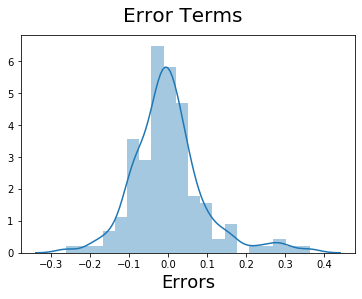

In [320]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

In [321]:
df_test.columns

Index([       'wheelbase',        'carlength',         'carwidth',
              'carheight',       'curbweight',       'enginesize',
              'boreratio',           'stroke', 'compressionratio',
             'horsepower',          'peakrpm',          'citympg',
             'highwaympg',            'price',      'alfa-romero',
                   'audi',              'bmw',            'buick',
              'chevrolet',            'dodge',            'honda',
                  'isuzu',           'jaguar',            'mazda',
                'mercury',       'mitsubishi',          'peugeot',
               'plymouth',          'porsche',          'renault',
                   'saab',           'subaru',           'toyota',
             'volkswagen',            'volvo',                 -1,
                        0,                  1,                  2,
                        3,              'gas',            'turbo',
                    'two',          'hardtop',        'hatchba

In [322]:
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price']

df_test[num_vars] = scaler.transform(df_test[num_vars])


In [323]:
y_test = df_test.pop('price')
X_test = df_test

In [324]:
X_train_new = X_train_new.drop(['const'], axis=1)
X_test_new = X_test[X_train_new.columns]


X_test_new = sm.add_constant(X_test_new)

In [325]:
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

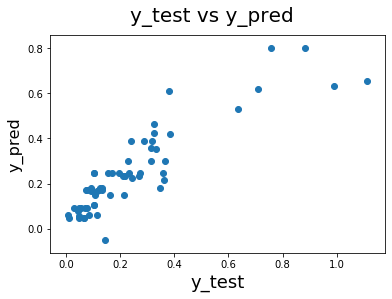

In [326]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)        

In [327]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.779656998063529